In [2]:
import qutip
import numpy as np

from relaqs.api.gates import RandomSU2

In [7]:
n_unitaries = 100
random_su2 = RandomSU2()
random_unitaries = [random_su2.get_matrix() for _ in range(n_unitaries)]
zero = np.array([1, 0]).reshape(2, 1)
random_states = [U @ zero for U in random_unitaries]

In [10]:
def plot_bloch_sphere_state(state):
    """ State can be a state vector or density matrix """
    qobj = qutip.Qobj(state)
    print(qobj)
    b = qutip.Bloch()
    #b.add_states(qobj) # need to convert to Qobj
    #b.add_points(qobj)
    b.show()

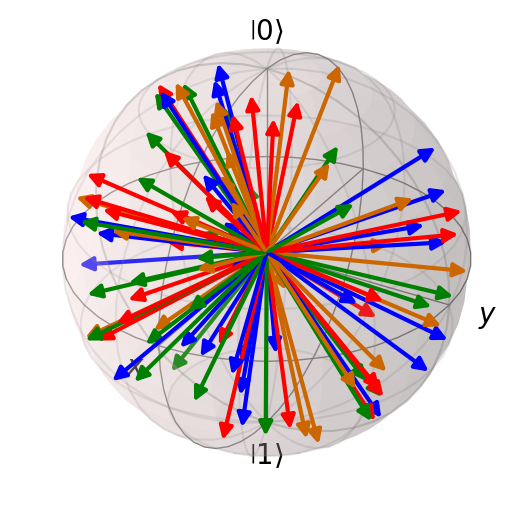

In [13]:
random_q_objs = [qutip.Qobj(state) for state in random_states]

b = qutip.Bloch()
b.add_states(random_q_objs)
b.show()